In [1]:
import numpy as np
import numpy.matlib as mtb
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import sys,os
import json
from tqdm import tqdm

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

In [2]:
title = 44769848
datatemp = np.load(str(title)+" offset filtered.npy")
chanpos = np.load("channel_positions.npy")

data = np.zeros(datatemp.shape)
for i in range(0,64):
    depth = 64-int(2*(chanpos[i,1]-1) + chanpos[i,0]-1)
    #Unfiltered
    #data[depth,:] = datatemp[i,:]
    #Filtered
    data[:,depth] = datatemp[:,i]

FileNotFoundError: [Errno 2] No such file or directory: '44769848 offset filtered.npy'

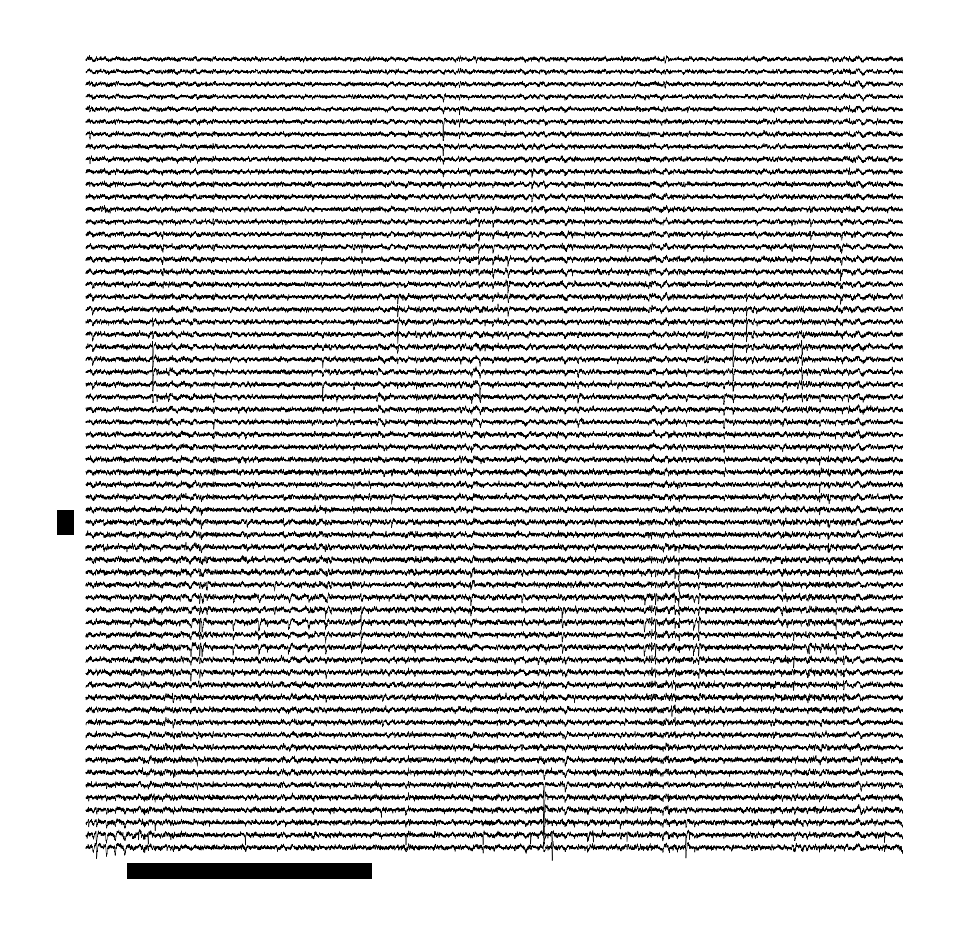

In [216]:
asp = 1;
width = 0.25;
scale = 400;

w,h = mpl.figure.figaspect(asp);
fig,ax = plt.subplots(figsize=(2*w,2*h));
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

offset = scale*(mtb.repmat(range(0,64),10000,1));
ax.plot((data)+offset,lw=width,c="black");

#Add X-axis bar (100ms, each unit is 1/fs units)
rect = mpl.patches.Rectangle((500, -1000), 3000, 500, linewidth=0, edgecolor='none', facecolor='black')
ax.add_patch(rect)

#Add Y-axis bar (each unit is 1/4uV)
rect2 = mpl.patches.Rectangle((-350, 10000), 200, 0.2*(4*1000), linewidth=0, edgecolor='none', facecolor='black')
ax.add_patch(rect2)

plt.savefig(str(title)+" plot.png")

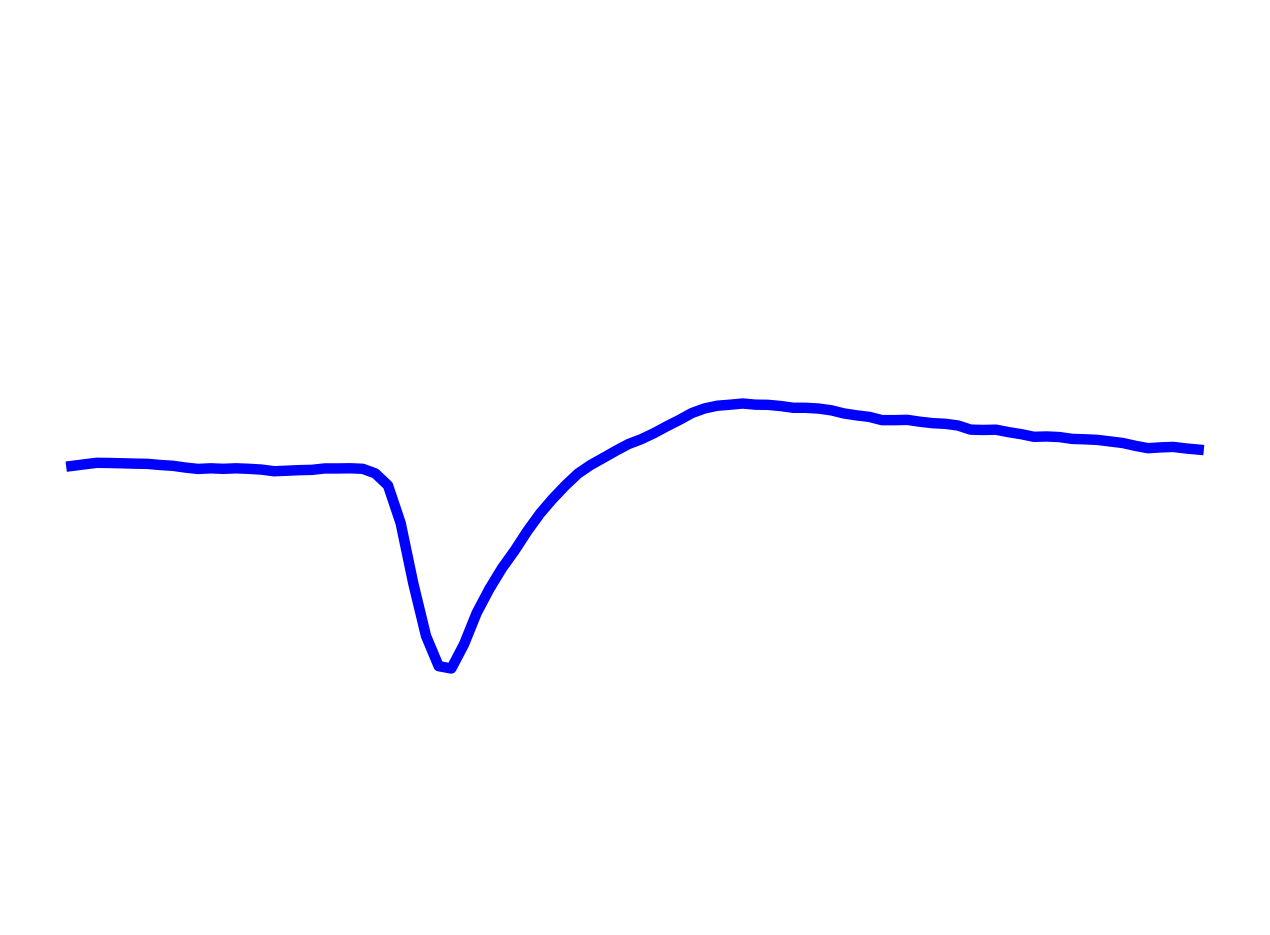

In [37]:
trans = 0.1
asp = 0.75;
width = 0.25;
scale = 400;

w,h = mpl.figure.figaspect(asp);
fig,ax = plt.subplots(figsize=(2*w,2*h));
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

cluster = 33
channel = 20
filename = "cluster "+str(cluster)+" channel "+str(channel)+" waveform.npy"
waves = np.load(filename)
#ax.plot(np.transpose(waves[12000:13000,:]),alpha=trans,c="black");
ax.set_ylim([-600,600])

avgs = np.zeros(waves.shape[1])
stds = np.zeros(waves.shape[1])
for i in range(0,waves.shape[1]):
    avgs[i] = np.mean(waves[:,i]);
    stds[i] = np.std(waves[:,i]);
    
#ax.fill_between(range(0,waves.shape[1]),avgs+stds,avgs-stds,alpha=trans,color="blue",lw=0)
ax.plot(range(0,waves.shape[1]),avgs,c="blue",lw=5)

ofilename = "cluster "+str(cluster)+" channel "+str(channel)+" waveform.png"
fig.savefig(ofilename,transparent=True)

In [22]:
trans=0.25
DIR = 'C:\\Users\\insan\\Desktop\\BS_33 1001'
with open(os.path.join(DIR,'Filtered Cluster Waveforms2.json'), 'r') as read_file:
    data = json.load(read_file)

for cluster in ['clust1']:#data.keys():
    clust = data[cluster]['cluster']
    channel = data[cluster]['channel']
    print('Processing '+str(cluster)+' on channel '+str(channel))
    
    if channel > 64:
        region = 'M2'
    else:
        region = 'AC'
    
    dat = np.array(data[cluster]['data'])
    xaxis = np.array(range(dat.shape[0]))/30000*1000
    mdat = np.mean(dat,axis=1)
    sdat = stats.sem(dat,axis=1)
    
    #plt.close('all')
    fig,ax = plt.subplots(figsize=(5,3))
    ax.fill_between(xaxis,mdat-sdat,mdat+sdat,color='black',alpha=trans,lw=0)
    ax.plot(xaxis,mdat,color='black')
    ax.set_xticks([0,1,2,3])
    ylims = ax.get_ylim()
    ax.text(2.25,(3*ylims[0]+ylims[1])/4,'N='+str(dat.shape[1]))
    ax.set_title(region+' Cluster #'+str(clust))
    
    responsefolder = os.path.join(DIR,"Filtered Waveforms")
    if not os.path.exists(responsefolder):
        os.makedirs(responsefolder)
    filename = os.path.join(responsefolder,region+' cluster '+str(clust))
    fig.savefig(filename+'.png',transparent=False,facecolor="white")
    fig.savefig(filename+'.pdf')
    
    #fig,ax = plt.subplots(figsize=(5,3))
    #ax.plot(xaxis,dat[:,1:min(dat.shape[1],1000)],color='black',alpha=0.01,lw=0.5)
    #ax.set_xticks([0,1,2,3])
    ##ax.set_ylim(20*np.array(ylims))
    #ax.text(2.25,(3*ylims[0]+ylims[1])/4,'N='+str(dat.shape[1]))
    #ax.set_title(region+' Cluster #'+str(clust))

KeyError: 'clust1'

100%|██████████| 110/110 [01:04<00:00,  1.70it/s]


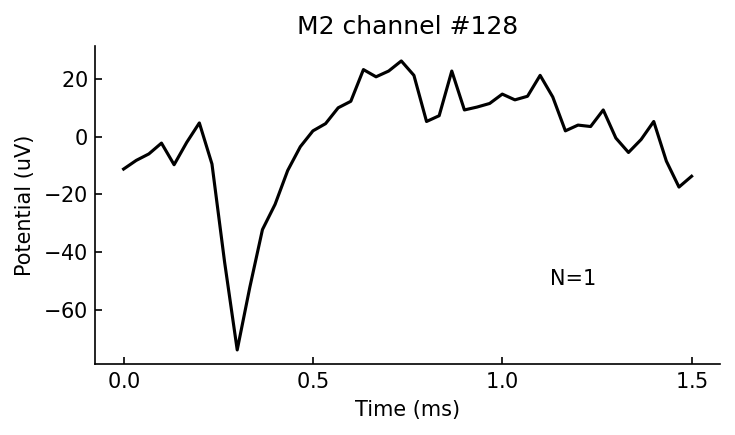

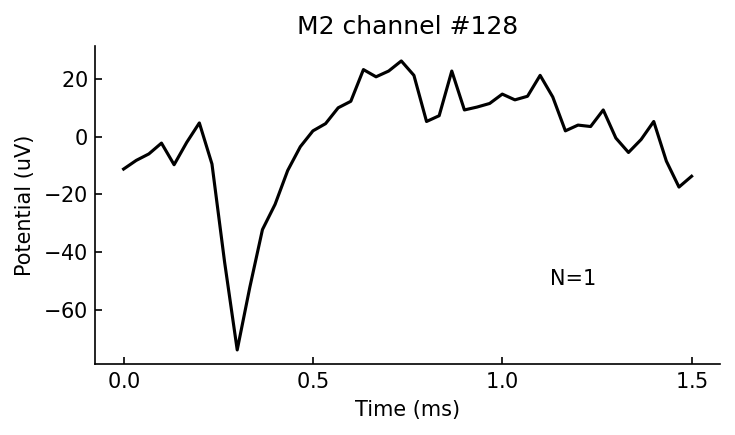

In [49]:
trans=0.25
DIR = 'C:\\Users\\insan\\Desktop\\BS_40 1001'
with open(os.path.join(DIR,'Channel Waveforms.json'), 'r') as read_file:
    data = json.load(read_file)

#for cluster in ['chan70']:
for cluster in tqdm(data.keys()):
    channel = data[cluster]['channel']
    #print('Processing '+str(cluster)+' on channel '+str(channel))
    
    if channel > 64:
        region = 'M2'
    else:
        region = 'AC'
    
    dat = np.array(data[cluster]['data'])
    dat = dat/4 # This is a conversion factor for the fact that NEVs are stored in 1/4 volt increments
    xaxis = np.array(range(dat.shape[0]))/30000*1000
    if len(dat.shape)>1:
        mdat = np.mean(dat,axis=1)
        sdat = np.std(dat,axis=1)
        num = dat.shape[1]
    else:
        mdat = dat
        sdat = np.zeros(len(dat))
        num = 1
    
    plt.close('all')
    fig,ax = plt.subplots(figsize=(5,3))
    ax.fill_between(xaxis,mdat-sdat,mdat+sdat,color='black',alpha=trans,lw=0)
    ax.plot(xaxis,mdat,color='black')
    ax.set_xticks([0,0.5,1.0,1.5])
    ylims = ax.get_ylim()
    ax.text(1.125,(3*ylims[0]+ylims[1])/4,'N='+str(num))
    ax.set_title(region+' channel #'+str(channel))
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Potential (uV)')
    
    responsefolder = os.path.join(DIR,"NEV Waveforms")
    if not os.path.exists(responsefolder):
        os.makedirs(responsefolder)
    filename = os.path.join(responsefolder,region+' channel '+str(channel))

    fig.tight_layout()
    fig.savefig(filename+'.png',transparent=False,facecolor="white")
    fig.savefig(filename+'.pdf')
    
    fig,ax = plt.subplots(figsize=(5,3))
    if num>1:
        overlaytrans = 1#10/min(num,1000)
        ax.plot(xaxis,dat[:,1:min(num,100)],color='grey',alpha=overlaytrans,lw=1)
    else:
        ax.plot(xaxis,dat,color='black')
    ax.set_xticks([0,0.5,1.0,1.5])
    ax.text(1.125,(3*ylims[0]+ylims[1])/4,'N='+str(min(num,100)))
    ax.set_title(region+' channel #'+str(channel))
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Potential (uV)')
    
    fig.tight_layout()
    fig.savefig(filename+' overlay.png',transparent=False,facecolor="white")
    fig.savefig(filename+' overlay.pdf')

Recording has been curated
good neurons: 33
MUA clusters: 69
noise clusters: 83


<ipython-input-64-895b7497a392>:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(figsize=(5,3))


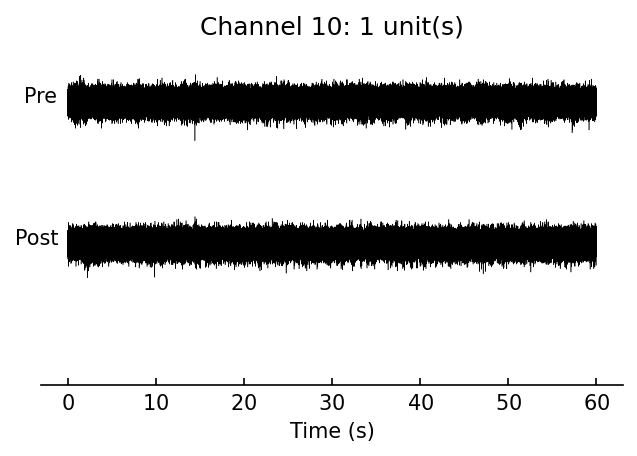

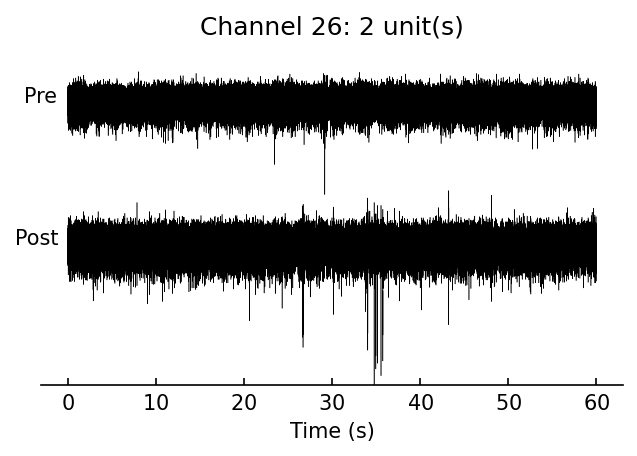

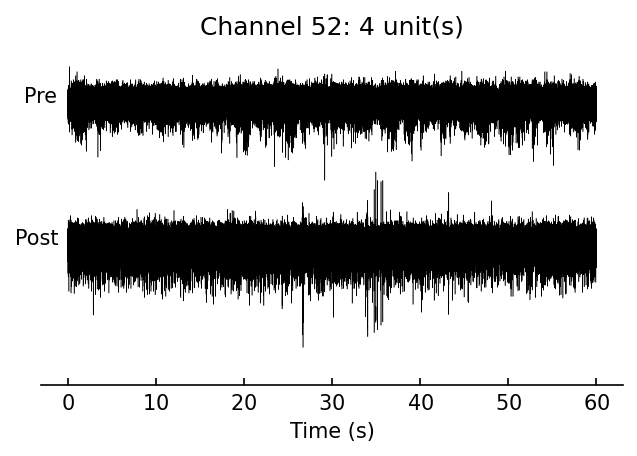

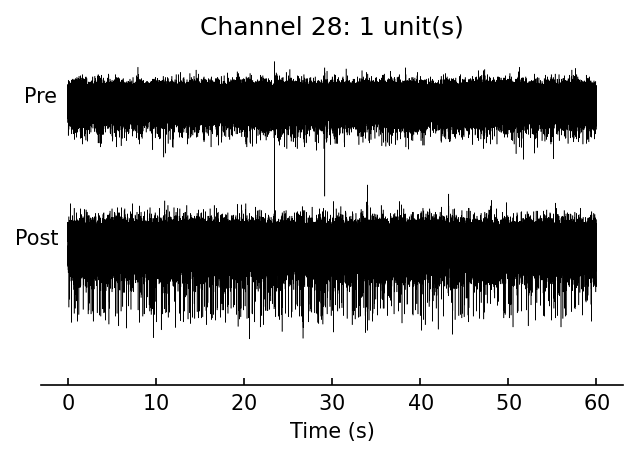

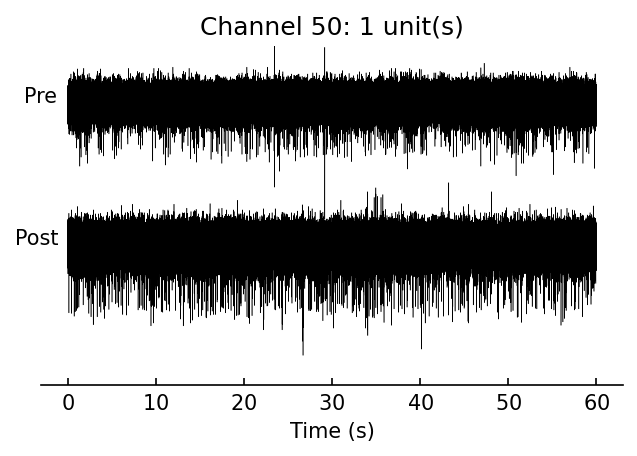

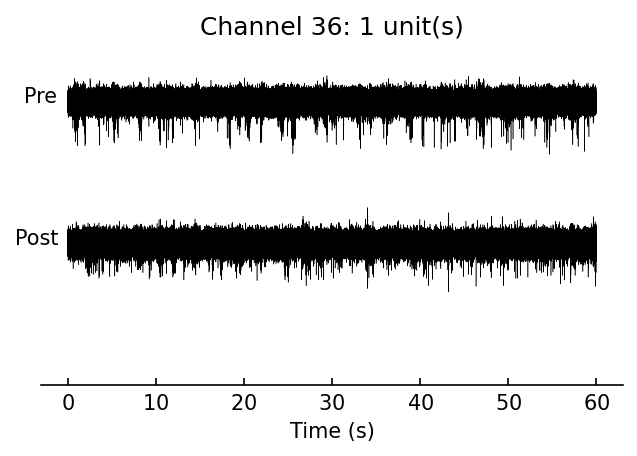

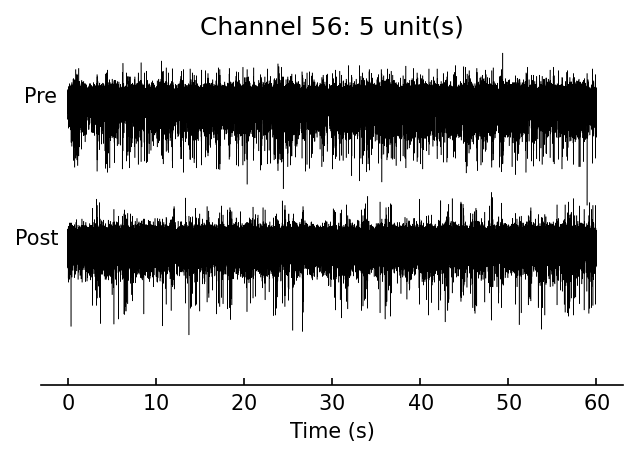

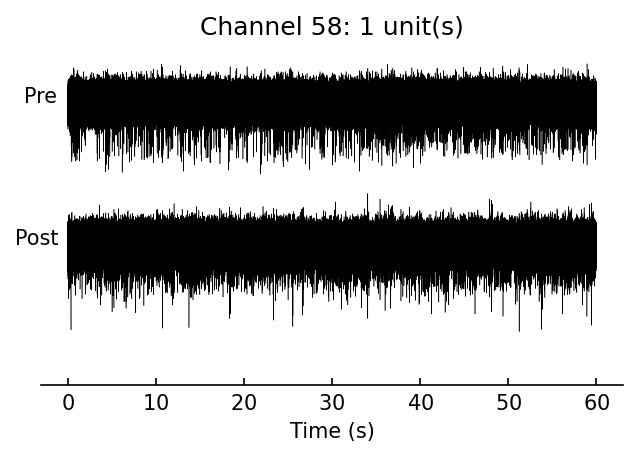

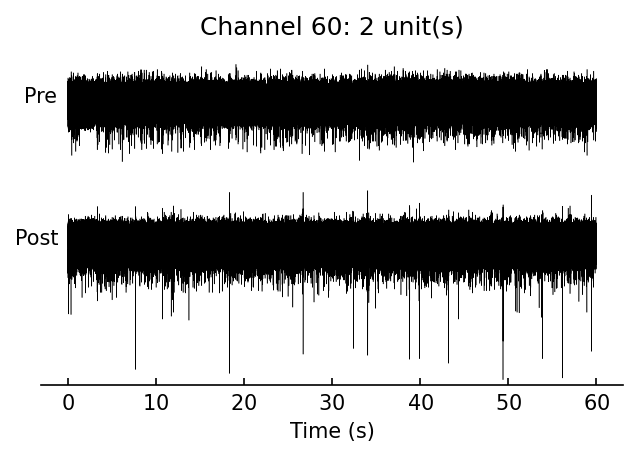

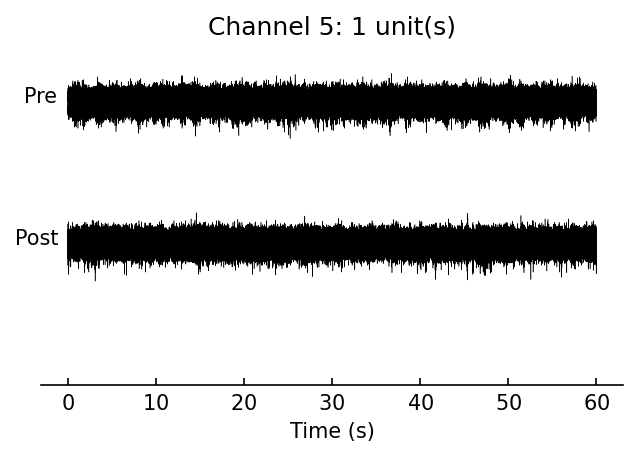

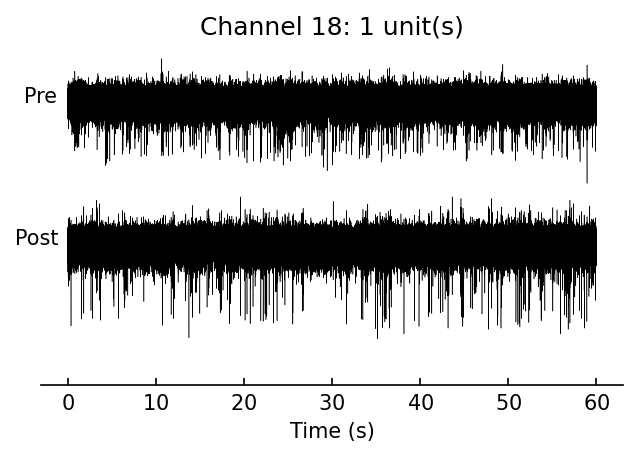

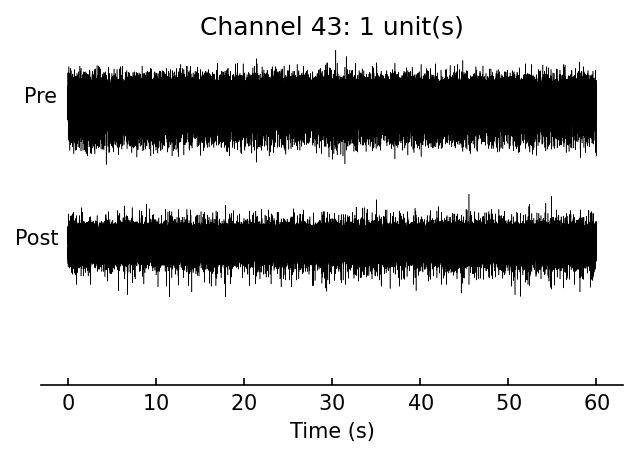

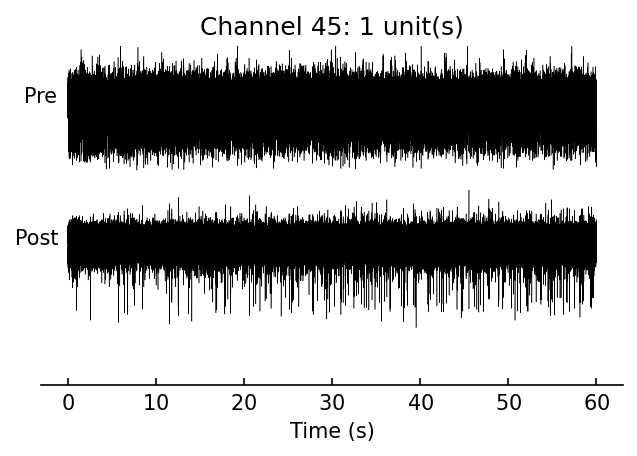

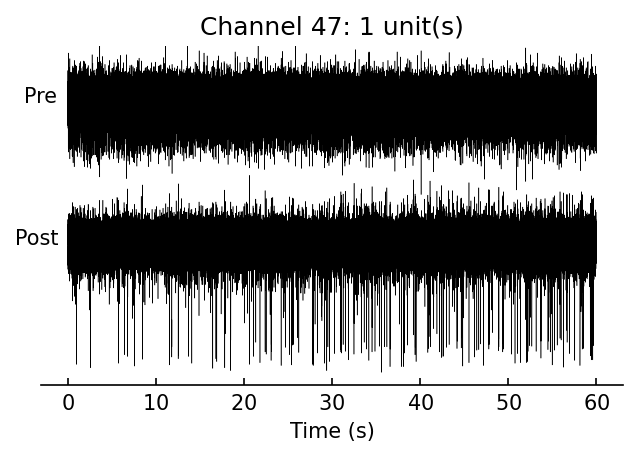

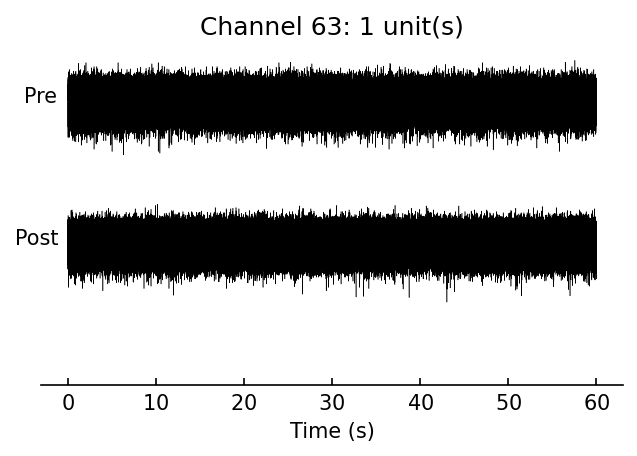

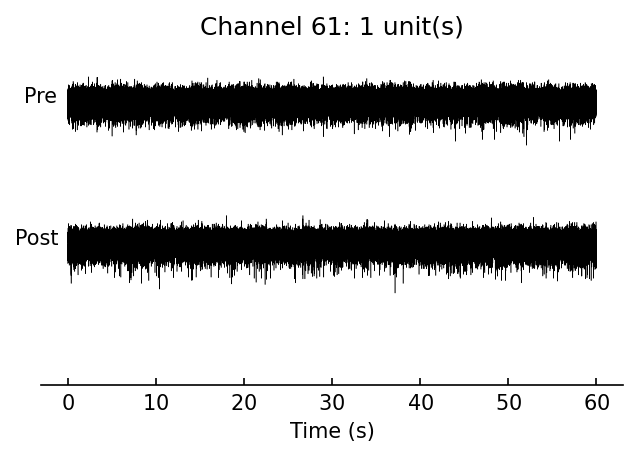

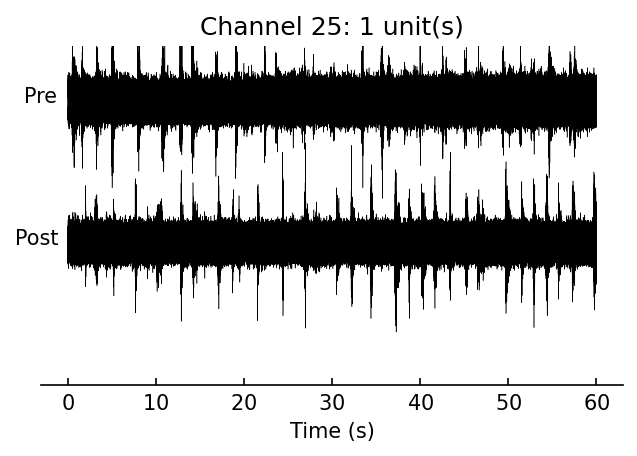

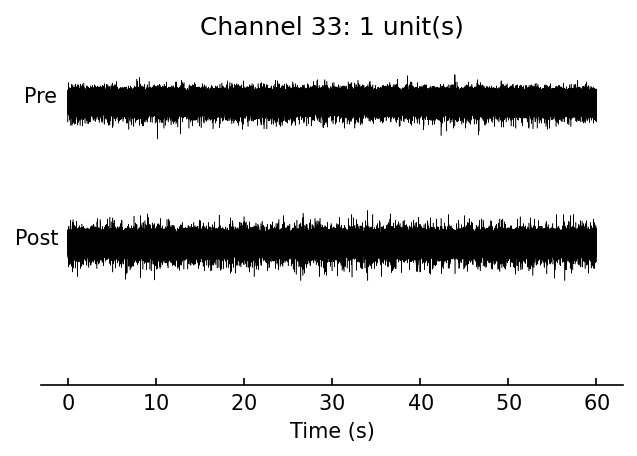

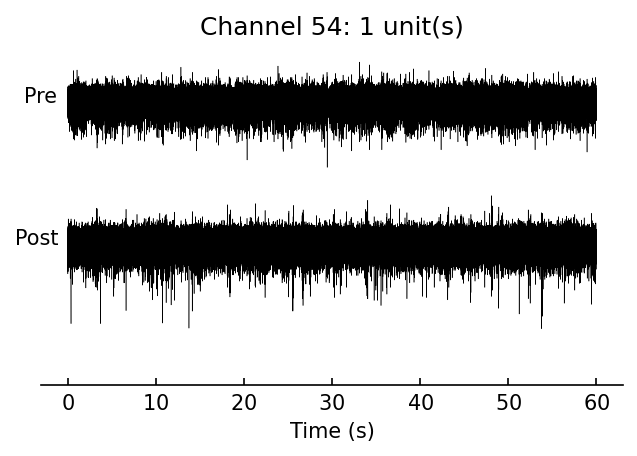

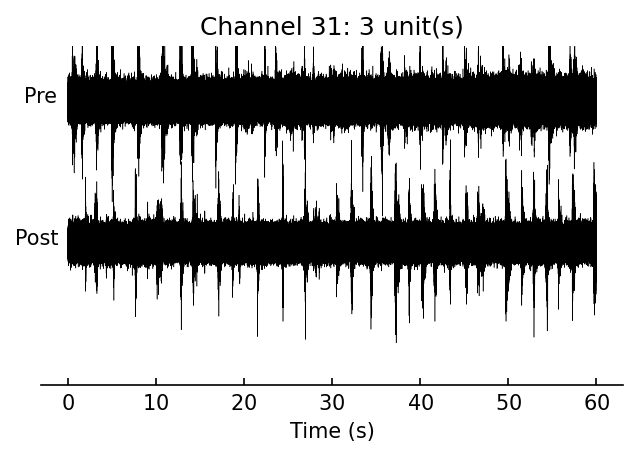

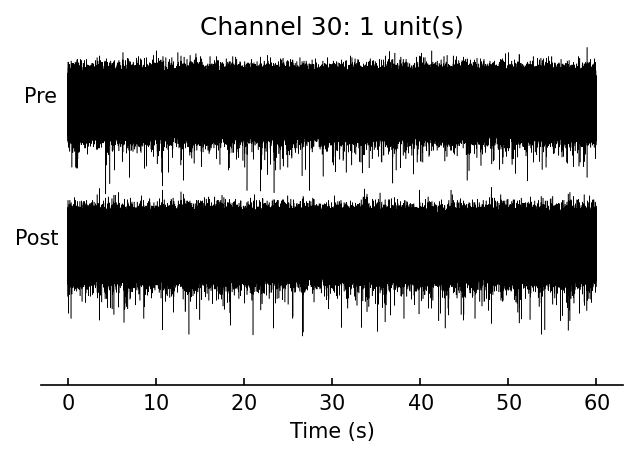

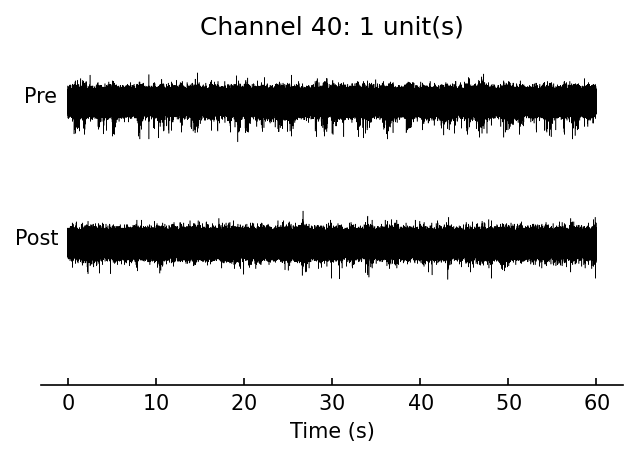

In [64]:
DIR = 'C:\\Users\\insan\\Desktop\\DS_30 1001'
folder = os.path.join(DIR,'AC')

wavespre = np.load(os.path.join(folder,'raw data pre application.npy'))
wavespost = np.load(os.path.join(folder,'raw data post application.npy'))

cluster_info = pd.read_csv(os.path.join(folder,"cluster_info.tsv"),delimiter="\t")
channels = cluster_info['ch']

phylabel = pd.read_csv(os.path.join(folder,"cluster_group.tsv"),delimiter="\t")

unitmapping = np.array(phylabel["cluster_id"])
good = phylabel["group"].values=="good"
good = unitmapping[good]
mua = phylabel["group"].values=="mua"
mua = unitmapping[mua]
noise = phylabel["group"].values=="noise"
noise = unitmapping[noise]
print("Recording has been curated")
print("good neurons: " + str(len(good)))
print("MUA clusters: " + str(len(mua)))
print("noise clusters: " + str(len(noise)))

goodchans = (channels[phylabel["group"].values=="good"].values)

chansAlreadyCalculated = []
for idx in range(len(goodchans)):
    chan = goodchans[idx]
    numunits = np.sum(np.logical_and(channels==chan,phylabel["group"].values=="good"))
    if chan not in chansAlreadyCalculated:
        plt.rcParams['axes.spines.left'] = False
        fig,ax = plt.subplots(figsize=(5,3))
        times = np.array(range(60*30000))/30000
        ax.set_ylim([-500,100])
        #ax.set_ylabel('uV')
        ax.set_xlabel('Time (s)')
        ax.set_title('Channel '+str(chan)+': '+str(numunits)+' unit(s)')
        ax.plot(times,wavespre[idx,:],lw=0.25,color='black')
        ax.plot(times,wavespost[idx,:]-250,lw=0.25,color='black')
        ax.set_yticks([])
        if len(chansAlreadyCalculated)==0:
            chansAlreadyCalculated = [chan]
        else:
            chansAlreadyCalculated = np.append(chansAlreadyCalculated,chan)
        ax.text(-5,0,'Pre')
        ax.text(-6,-250,'Post')
            
        fig.savefig(os.path.join(folder,'channel '+str(chan+1)+' raw data pre-post application.png'),transparent=False,facecolor="white")
        fig.savefig(os.path.join(folder,'channel '+str(chan+1)+' raw data pre-post application.pdf'))